In [9]:
import pandas as pd

In [10]:
dataset = pd.read_csv("../../datasets/problem1/merged.csv", engine="pyarrow")
dataset.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,PURCHASE_DATE,MAGIC_KEY,BOX_COUNT,MILK_PURCHAED,MEAT_PURCHAED
0,260,1,0,10.0,1.8,17.98,2018-10-01,2940398F26F,1.0,1,1
1,118,0,0,8.0,1.3,15.98,2018-10-01,2CA943107B8,1.0,1,1
2,118,0,0,8.0,1.3,15.98,2018-10-01,2C00FF1E2DC,1.0,1,1
3,118,0,0,8.0,1.3,15.98,2018-10-01,2C1A276B78F,1.0,1,1
4,118,0,0,8.0,1.3,15.98,2018-10-01,2BD8A103BA3,1.0,1,1


In [11]:
# Convert purchase date to Unix timestamp
dataset["PURCHASE_DATE"] = pd.to_datetime(dataset["PURCHASE_DATE"])

In [16]:
# Hash the MAGIC_KEY column
dataset["MAGIC_KEY"] = dataset["MAGIC_KEY"].apply(hash)

dataset

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,PURCHASE_DATE,MAGIC_KEY,BOX_COUNT,MILK_PURCHAED,MEAT_PURCHAED
0,260,1,0,10.0,1.8,17.98,2018-10-01,-141936932893598377,1.0,1,1
1,118,0,0,8.0,1.3,15.98,2018-10-01,3971345463698413705,1.0,1,1
2,118,0,0,8.0,1.3,15.98,2018-10-01,3826562679054993883,1.0,1,1
3,118,0,0,8.0,1.3,15.98,2018-10-01,5528487159319504338,1.0,1,1
4,118,0,0,8.0,1.3,15.98,2018-10-01,7168164322972148108,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2455795,80,0,0,0.0,2.9,11.96,2019-02-28,230681019980019799,1.0,0,1
2455796,80,0,0,0.0,2.9,11.96,2019-02-28,8955403779067202916,1.0,0,1
2455797,80,0,0,0.0,2.9,11.96,2019-02-28,8521906399725036796,1.0,0,1
2455798,80,0,0,0.0,2.9,11.96,2019-02-28,-425648873102058363,1.0,0,1


In [17]:
import seaborn as sns

<Axes: >

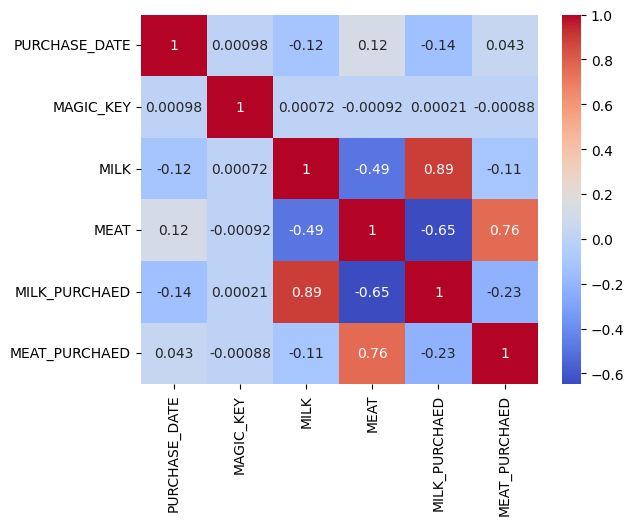

In [20]:
# make a correlation heatmap

sns.heatmap(
    dataset[[
        "PURCHASE_DATE",
        "MAGIC_KEY",
        "MILK",
        "MEAT",
        "MILK_PURCHAED",
        "MEAT_PURCHAED"
    ]].corr(method="pearson"), cmap="coolwarm", annot=True
)
